# Computational Genomic - Practice 2

## **Name:** Esra Kashaninia

## **Student ID:** 402210676

<br>

---

## Overview: Genome Assembly and Analysis Challenges

In this practice, we aim to perform genome assembly and analysis for two bacteria: *E. coli* and *Shigella flexneri*. Genome as\sembly for bacteria, despite their relatively smaller genomes, poses several challenges. Bacterial genomes can contain repetitive elements, making it difficult for short-read assemblers to resolve these repeats into single contiguous sequences. Here we utilize tools like SPAdes for assembly and BWA for read alignment, exploring metrics such as N50, total length, and contig count, which provide insights into the quality of our assembled genome.




---

## 1. Genome Assembly for *E. coli*

The first step involves assembling the genome of *E. coli* using the SPAdes assembler, a popular tool designed for short-read assemblies that handles common issues such as chimeric reads and bubbles in sequencing data.

<br>

Step 1: Download *E. coli* Reads and Assemble with SPAdes

In [1]:
# Download E. coli reads
!wget -O ecoli_reads.fastq https://trace.ncbi.nlm.nih.gov/Traces/sra-reads-be/fastq?acc=SRR13921546

--2024-11-27 20:17:49--  https://trace.ncbi.nlm.nih.gov/Traces/sra-reads-be/fastq?acc=SRR13921546
Resolving trace.ncbi.nlm.nih.gov (trace.ncbi.nlm.nih.gov)... 130.14.29.113, 2607:f220:41e:4290::113
Connecting to trace.ncbi.nlm.nih.gov (trace.ncbi.nlm.nih.gov)|130.14.29.113|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/x-gzip]
Saving to: ‘ecoli_reads.fastq’

ecoli_reads.fastq       [              <=>   ] 363.28M  1.15MB/s    in 5m 13s  

2024-11-27 20:23:04 (1.16 MB/s) - ‘ecoli_reads.fastq’ saved [380926697]



In [2]:
# Install SPAdes if not already installed
!sudo apt-get install spades

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  bamtools bwa libbamtools2.5.1 libhat-trie0 libhts3 libhtscodecs2 libnlopt0
  libssw0 python3-attr python3-iniconfig python3-joblib python3-numpy
  python3-packaging python3-pluggy python3-psutil python3-py python3-pygments
  python3-pytest python3-simplejson python3-toml python3-yaml samtools
Suggested packages:
  python-attr-doc python-numpy-doc python-psutil-doc subversion
  python-pygments-doc ttf-bitstream-vera cwltool
The following NEW packages will be installed:
  bamtools bwa libbamtools2.5.1 libhat-trie0 libhts3 libhtscodecs2 libnlopt0
  libssw0 python3-attr python3-iniconfig python3-joblib python3-numpy
  python3-packaging python3-pluggy python3-psutil python3-py python3-pygments
  python3-pytest python3-simplejson python3-toml python3-yaml samtools spades
0 upgraded, 23 newly installed, 0 to remove and 49 not upgraded.
Need to

In [3]:
# Run SPAdes for E. coli genome assembly

# because if you don't mkdir, bwa will say "no such file or directory"
!sudo mkdir -p spade_ecoli

!spades.py -s ecoli_reads.fastq -o spade_ecoli --only-assembler -k 21,33,55

Command line: /usr/lib/spades/bin/spades.py	-s	/content/ecoli_reads.fastq	-o	/content/spade_ecoli	--only-assembler	-k	21,33,55	

System information:
  SPAdes version: 3.13.1
  Python version: 3.10.12
  OS: Linux-6.1.85+-x86_64-with-glibc2.35

Output dir: /content/spade_ecoli
Mode: ONLY assembling (without read error correction)
Debug mode is turned OFF

Dataset parameters:
  Multi-cell mode (you should set '--sc' flag if input data was obtained with MDA (single-cell) technology or --meta flag if processing metagenomic dataset)
  Reads:
    Library number: 1, library type: single
      left reads: not specified
      right reads: not specified
      interlaced reads: not specified
      single reads: ['/content/ecoli_reads.fastq']
      merged reads: not specified
Assembly parameters:
  k: [21, 33, 55]
  Repeat resolution is enabled
  Mismatch careful mode is turned OFF
  MismatchCorrector will be SKIPPED
  Coverage cutoff is turned OFF
Other parameters:
  Dir for temp files: /content/s


After assembling the genome, SPAdes will output several files in the specified directory, including the main contig file. We can assess the quality of the assembly using metrics like N50, total contig length, and the number of contigs.

### Explain this Key Metrics:

1. **N50**:


-> Half of the genome sequence is covered by contigs larger than or equal the N50 contig size.

 It measures the contiguity of the assembly. The greatest the number, the more contiguous the assembly is. It is calculated by sorting the contigs from longest to shortest, then summing the length of the contigs until 50% of the total assembly size is reached. The N50 is the length of the contig in which this threshold is reached.

2. **Total Length**:

from samtools docs:
 total length - number of processed bases from reads that are neither secondary nor supplementary (flags 0x100 (256) and 0x800 (2048) are not set).

Sum of all contig lengths. It shows what percentage of the genome length was assembled.

3. **Number of Contigs**:

A contig (from contiguous) is a set of overlapping DNA segments that together represent a consensus region of DNA.

When creating a draft genome, individual reads of DNA are second assembled into contigs, which, by the nature of their assembly, have gaps between them.

So number of contigs is number of gaps + 1

If coverage is C, assuming the number of reads starting at position i follows the poisson distribution with lambda = C, the expected number of contigs will be N * exp(-C), where N is the number of reads.


4. **Genome Coverage**:

The average number of reads over a nucleotide in the genome

C = LN / G

C stands for coverage -
G is the haploid genome length -
L is the read length -
N is the number of reads

more coverage -> less gaps -> longer and fewer contigs

<br>

https://mathweb.ucsd.edu/~gptesler/283/slides/shotgun_f19-handout.pdf

https://en.wikipedia.org/wiki/N50,_L50,_and_related_statistics

https://help.biobam.com/space/OUM/3501034617/Genome+Assembly+Quality+Assessment

https://www.researchgate.net/post/How-to-calculate-the-genome-coverage-and-duplication-ratio-of-assembly-contigs



---

## 2. Download and Normalize *Citrobacter* Reads

The next step involves downloading the reads for *Citrobacter*, performing adapter trimming, and quality control using `fastp`.

In [4]:
# Download Citrobacter reads
!wget -O citrobacter_reads.fastq https://trace.ncbi.nlm.nih.gov/Traces/sra-reads-be/fastq?acc=SRR31179981

--2024-11-27 20:52:03--  https://trace.ncbi.nlm.nih.gov/Traces/sra-reads-be/fastq?acc=SRR31179981
Resolving trace.ncbi.nlm.nih.gov (trace.ncbi.nlm.nih.gov)... 130.14.29.113, 2607:f220:41e:4290::113
Connecting to trace.ncbi.nlm.nih.gov (trace.ncbi.nlm.nih.gov)|130.14.29.113|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/x-gzip]
Saving to: ‘citrobacter_reads.fastq’

citrobacter_reads.f     [               <=>  ] 106.91M  1.23MB/s    in 89s     

2024-11-27 20:53:34 (1.20 MB/s) - ‘citrobacter_reads.fastq’ saved [112099346]



In [5]:
# Doing some Normalization and triming adaptors
!sudo apt-get install fastp
!sudo apt-get install seqtk

!seqtk seq citrobacter_reads.fastq > citro_fixed.fastq
!fastp -i citro_fixed.fastq -o citro_trimmed.fastq -h citro.html -j citro.json --detect_adapter_for_pe --trim_poly_g --cut_front --cut_tail --cut_right --cut_mean_quality 20

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fastp
0 upgraded, 1 newly installed, 0 to remove and 49 not upgraded.
Need to get 193 kB of archives.
After this operation, 640 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fastp amd64 0.20.1+dfsg-1 [193 kB]
Fetched 193 kB in 1s (214 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fastp.
(Reading database ... 125531 files and directories currently i

The `fastp` tool allows us to remove low-quality reads and adapters that could negatively impact alignment accuracy in the following steps.



---

## 3. Align Trimmed *Citrobacter* Reads to Assembled *E. coli* Genome

Using BWA, we align the trimmed *Citrobacter* reads to the *E. coli* genome to evaluate the similarity between these two bacterial genomes.

In [6]:
!pip install Bio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 281.0/281.0 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 52.9 MB/s eta 0:00:00


In [7]:
# Index the assembled E. coli genome (assumed in contigs.fasta)
!bwa index spade_ecoli/contigs.fasta

[bwa_index] Pack FASTA... 0.03 sec
[bwa_index] Construct BWT for the packed sequence...
[bwa_index] 2.54 seconds elapse.
[bwa_index] Update BWT... 0.03 sec
[bwa_index] Pack forward-only FASTA... 0.02 sec
[bwa_index] Construct SA from BWT and Occ... 0.83 sec
[main] Version: 0.7.17-r1188
[main] CMD: bwa index spade_ecoli/contigs.fasta
[main] Real time: 3.623 sec; CPU: 3.455 sec


In [8]:
# Align trimmed Citrobacter reads to the E. coli assembled genome
!bwa mem spade_ecoli/contigs.fasta citro_trimmed.fastq > citro_ecoli.sam

[M::bwa_idx_load_from_disk] read 0 ALT contigs
[M::process] read 33224 sequences (10000300 bp)...
[M::process] read 33224 sequences (10000366 bp)...
[M::mem_process_seqs] Processed 33224 reads in 13.136 CPU sec, 20.515 real sec
[M::process] read 33224 sequences (10000291 bp)...
[M::mem_process_seqs] Processed 33224 reads in 12.167 CPU sec, 12.177 real sec
[M::process] read 33224 sequences (10000386 bp)...
[M::mem_process_seqs] Processed 33224 reads in 11.804 CPU sec, 11.959 real sec
[M::process] read 33224 sequences (10000313 bp)...
[M::mem_process_seqs] Processed 33224 reads in 13.892 CPU sec, 13.983 real sec
[M::process] read 33224 sequences (10000336 bp)...
[M::mem_process_seqs] Processed 33224 reads in 11.120 CPU sec, 11.061 real sec
[M::process] read 33224 sequences (10000360 bp)...
[M::mem_process_seqs] Processed 33224 reads in 13.973 CPU sec, 14.217 real sec
[M::process] read 33224 sequences (10000372 bp)...
[M::mem_process_seqs] Processed 33224 reads in 12.748 CPU sec, 13.188 r

In [9]:
# Install samtools if not already installed
!apt-get install samtools

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
samtools is already the newest version (1.13-4).
samtools set to manually installed.
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.


In [10]:
# Convert SAM to BAM
!samtools view -S -b citro_ecoli.sam > citro_ecoli.bam

In [11]:
# Sort the BAM file
!samtools sort citro_ecoli.bam -o sorted_citro_ecoli.bam

---

## 4. Calculate Similarity Using Alignment Statistics

The alignment statistics provide insights into the similarity between *E. coli* and *Citrobacter*.

Explain key metrics from the `samtools` flagstat output:
<br>
<br>

- **Total Reads Mapped**:
 reads mapped - number of reads, paired or single, that are mapped (flag 0x4 or 0x8 not set).
 That includes multimappers, so it won't necessarily be the number of mapped reads.

command format:

 samtools flagstat maps/bt2.global.sam

 <br>

- **Coverage Depth**:

number of times each nucleotide position appeared in reads. Can be obtained by these commands:

- get coverage of whole alignment file

samtools coverage bt2.g.sorted.bam

- get coverage of a particular sequence

samtools coverage bt2.g.sorted.bam -r NC_003283.11

- get coverage of a particular sequence given initial and end position

samtools coverage bt2.g.sorted.bam -r NC_003280.10:1000-25000

- get coverage as a histogram

samtools coverage bt2.g.sorted.bam --histogram

- get coverage as depth plot

samtools coverage bt2.g.sorted.bam --plot-depth

- store coverage in a tsv/tab-separated file to open as Excel file

samtools coverage bt2.g.sorted.bam > coverage.tsv




https://www.biostars.org/p/138116/

http://www.htslib.org/doc/samtools-stats.html

https://medium.com/@manabeel.vet/a-beginners-guide-to-genomic-data-analysis-samtools-and-genome-mapping-visualization-in-d2f81ed907a7






In [12]:
# Generate alignment statistics
!samtools flagstat sorted_citro_ecoli.bam > align_stats.txt

In [13]:
# Show alignment statistics file
!cat align_stats.txt

1023752 + 0 in total (QC-passed reads + QC-failed reads)
1004311 + 0 primary
0 + 0 secondary
19441 + 0 supplementary
0 + 0 duplicates
0 + 0 primary duplicates
485726 + 0 mapped (47.45% : N/A)
466285 + 0 primary mapped (46.43% : N/A)
0 + 0 paired in sequencing
0 + 0 read1
0 + 0 read2
0 + 0 properly paired (N/A : N/A)
0 + 0 with itself and mate mapped
0 + 0 singletons (N/A : N/A)
0 + 0 with mate mapped to a different chr
0 + 0 with mate mapped to a different chr (mapQ>=5)


In [14]:
import re
from math import inf

# Function to calculate similarity based on alignment statistics
def calculate_similarity(alignment_stats_file):

  with open(alignment_stats_file, 'r') as f:
    lines = f.readlines()

  total_reads = 0
  mapped_reads = 0

  ## WRITE YOUR CODE HERE
  similarity_percentage = -inf

  total_pat = r'(\d+)(?:\s+\+\s+0)?\s+in total'
  map_pat = r'(\d+)(?:\s+\+\s+0)?\s+primary mapped '

  for line in lines:
    total_match = re.search(total_pat, line)
    if total_match != None:
        total_reads = int(total_match.groups(0)[0])
        # print(total_reads)

    map_match = re.search(map_pat, line)
    if map_match != None:
        mapped_reads = int(map_match.groups(0)[0])
        # print(mapped_reads)

    if total_reads > 0:
        similarity_percentage = mapped_reads * 100 / total_reads
  ##

  return {
      "total_reads": total_reads,
      "mapped_reads": mapped_reads,
      "similarity_percentage": similarity_percentage
  }


similarity_metrics = calculate_similarity("align_stats.txt")
similarity_metrics

{'total_reads': 1023752,
 'mapped_reads': 466285,
 'similarity_percentage': 45.54667536669037}

## Additional Topics



### Assembly Challenges

1. Genome assembly for bacterial genomes faces challenges such as **Repetitive Sequences, Short Reads & Chimeric Reads** , explain them:

Repetitive DNA sequences are segments of the genome where specific patterns of nucleotides occur multiple times in succession.

They may result in fragmented assemblies or misassembled contigs because assembly algorithms may not determinstically find the order of their occurences soley based on read data.
to solve this problem, use long-read sequencing technologies (e.g., PacBio or Oxford Nanopore) that generate reads long enough to span repeats.
<br>

The limitations of short-read sequencing:

 As they are short, it may not be possible to map reads to the specific region of the reference genome they came from. If reads cannot be mapped to the reference genome, they may be discarded, leading to a gap in sequencing data.

- Genes with a pseudogene or genes in repetitive regions can therefore be difficult to sequence.
- Repeat expansion disorders can be difficult to detect accurately, especially if the length of the short tandem repeat region exceeds the read length. This is why these are usually tested for separately.
- In addition, large copy number variants and structural variants are not usually detected by short-read sequencing as effectively as they are detected by gold-standard methods such as arrays or karyotyping.
- Methylation changes are not detected, which require methylation studies.

Long-read sequencing is gaining ground in clinical applications as it overcomes some of these issues.
<br>

Chimeric reads:

A chimera in DNA sequencing is basically when your polymerase has synthesized a new strand of DNA from two different parent strands of DNA during your PCR. So the resulting DNA sequence is not representative of any parent DNA sequences. This is why you screen them out, especially for ecology studies, as chimeras will misrepresent what (bacteria, virus, fungi, etc.) is in your sample.


https://pmc.ncbi.nlm.nih.gov/articles/PMC7736650/

https://www.genomicseducation.hee.nhs.uk/genotes/knowledge-hub/short-read-sequencing/

https://www.reddit.com/r/bioinformatics/comments/ax8edr/what_is_a_chimeric_read_or_a_chimeric_alignment/

<br>
2. What other challenges bacterial genome have for assembly?

- Some sequencing platforms, like Illumina, have a bias towards GC balanced regions, which can lead to uneven sequencing depth.
- Assembling bacterial genomes can be computationally intensive.
- There's a trade-off between assembling as many regions as possible, or fewer but more accurate sequences.

Third-generation sequencing (TGS) has made it possible to assemble bacterial genomes more quickly, but most current TGS assemblers are designed for species with non-circular genomes

https://pmc.ncbi.nlm.nih.gov/articles/PMC9473318/

https://genomics.umn.edu/services/long-read-technologies


### Key Assembly Metrics
- **Distribution of Contig Lengths**: Plotting the distribution of contig lengths allows us to visually assess assembly fragmentation.

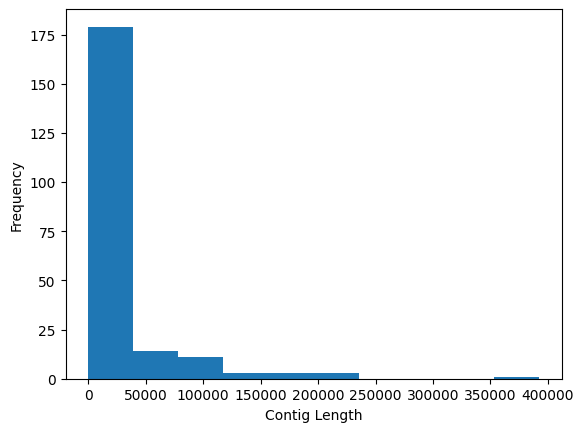

In [15]:
# Plot distribution of cotig lengths
from Bio import SeqIO
from matplotlib import pyplot as plt


contig_lens = [len(elem) for elem in SeqIO.parse("spade_ecoli/contigs.fasta", "fasta")]
plt.hist(contig_lens)
plt.xlabel("Contig Length")
plt.ylabel("Frequency")
plt.show()


In [16]:
# Report some metrics(min, max, avg, std)
import numpy as np

stat_d = {
    "Min Contig len": np.min(contig_lens),
    "Max Contig len": np.max(contig_lens),
    "Mean Contig len": np.mean(contig_lens),
    "Standard Deviation of Contig Len": np.std(contig_lens)
}

for k, v in stat_d.items():
    print(k, ":", np.round(v, 5))


Min Contig len : 56
Max Contig len : 392317
Mean Contig len : 21646.79907
Standard Deviation of Contig Len : 47554.72081




```
# This is formatted as code
```

- Write your analysis about this work:

Most contigs are short, so repetitive areas will be a problem and we will have a more complex de Bruijn graph with possibly more than just one Eulerian path.
The standard deviation of contigs is high, which is mostly due to the few contigs of length 350000-400000. Though there aren't many of them and they cannot improve N50 much, they can be key to assembling repetitive areas.

The genomes of Ecoli and Citrobacter are 46% similar, which reflects their relative closeness on the tree of species.


### Definitions from SPAdes Documentation

1. **Chimeric Reads**:
A chimeric read or split read means that multiple subsections of that read align to different positions in a reference genome. They are not always a sign of the presence of a PCR chimera and often used to detect structural variations.
2. **Bluge**:
Bulges and tips occur due to errors in the middle and ends of reads, respectively.
3. **k-bimer**:

 A k-bimer is a triple (a|b, d) consisting of k-mers a and b together with an integer d (estimated distance between particular instances of a and b in a genome).

 SPAdes first extracts k-bimers from bireads, resulting in k-bimers with inexact distance estimates (inherited from biread distance estimates). The k-bimer adjustment approach transforms this set of k-bimers (with rather inaccurate distance estimates) into a set of adjusted k-bimers with exact or nearly exact distance estimates. Similarly to error correction, which replaces original reads with virtual error-corrected reads, k-bimer adjustment substitutes original k-bimers by adjusted k-bimers.

This approach breaks the paired–end reads into pairs of k-mers which are transformed to define pairs of edges (biedges) in the de Bruijn graphs

https://en.wikipedia.org/wiki/Chimera_(molecular_biology)#Chimeric_read

https://pmc.ncbi.nlm.nih.gov/articles/PMC3342519/

https://en.wikipedia.org/wiki/SPAdes_(software)